In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20, 8)
from prettytable import PrettyTable
table = PrettyTable()
df = pd.read_csv("Stats survey1.csv", sep=",", encoding="utf-8", nrows=50)
df.head()

,Timestamp,Sex,Grade,Year,Department,GPA,Accomodation,Allowance,Scholarship,Studying hours,Party,Alcohol consumption,Missedclass,Fail,Romanticrelationship,Parentsapproval
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,Yes,8+,Only weekends,5-Mar,4+,0,No,Yes
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-Mar,2,8+,3,0,No,Yes
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,5-Mar,3,8+,2,0,Yes,Yes
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-Mar,Only weekends,8-May,1,3,No,Yes


In [ ]:
df.shape

(50, 16)

In [ ]:
df.info

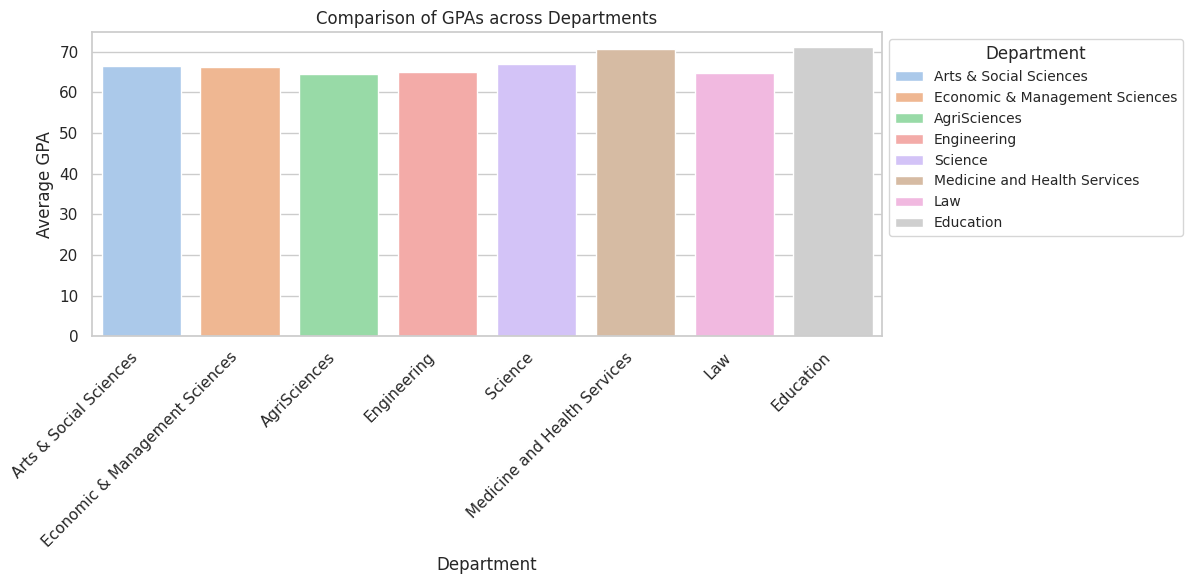

In [ ]:
# Graph 1 Compare GPAs across different departments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Stats survey1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
#sns.barplot(x='Department', y='GPA', data=df, errorbar=None, palette='pastel')
#sns.barplot(x='Department', y='GPA', data=df, errorbar=None, palette='pastel', hue='Department', dodge=False)
ax = sns.barplot(x='Department', y='GPA', data=df, errorbar=None, palette='pastel', hue='Department', dodge=False, saturation=0.75)
ax.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.title('Comparison of GPAs across Departments')
plt.ylabel('Average GPA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()




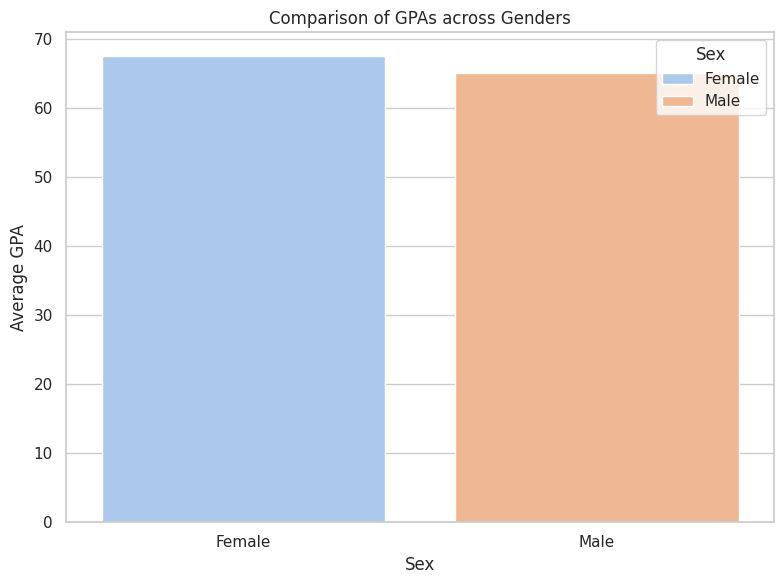

In [ ]:
# Graph 2 Compare GPAs across genders
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='GPA', data=df, errorbar=None, palette='pastel', hue='Sex', dodge=False)
plt.title('Comparison of GPAs across Genders')
plt.ylabel('Average GPA')
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

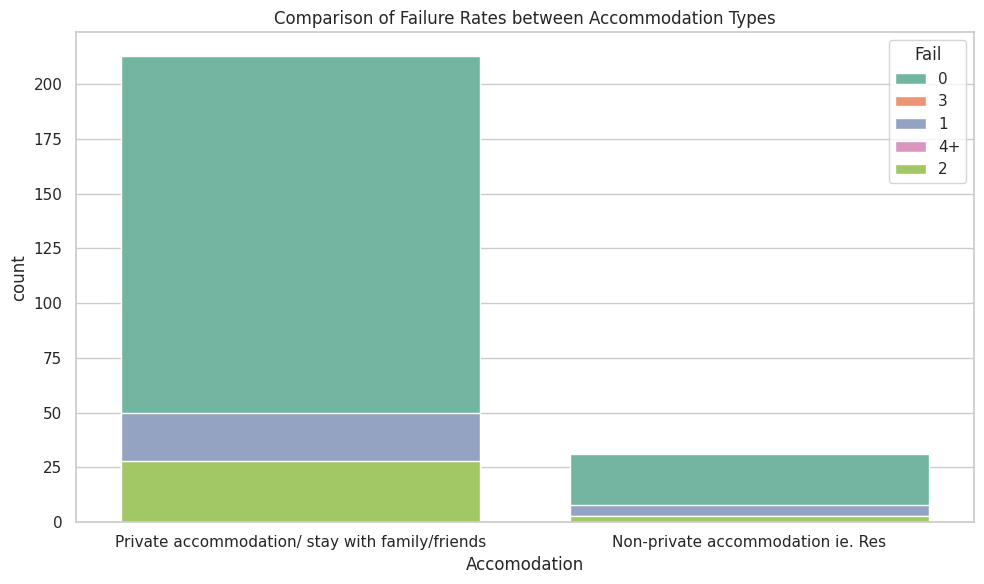

In [78]:
# Graph 3 Compare Failure Rates
plt.figure(figsize=(10, 6))
sns.countplot(x='Accomodation', hue='Fail', data=df, palette='Set2', dodge=False)
plt.title('Comparison of Failure Rates between Accommodation Types')
plt.legend(title='Fail', loc='upper right')
plt.tight_layout()
plt.show()

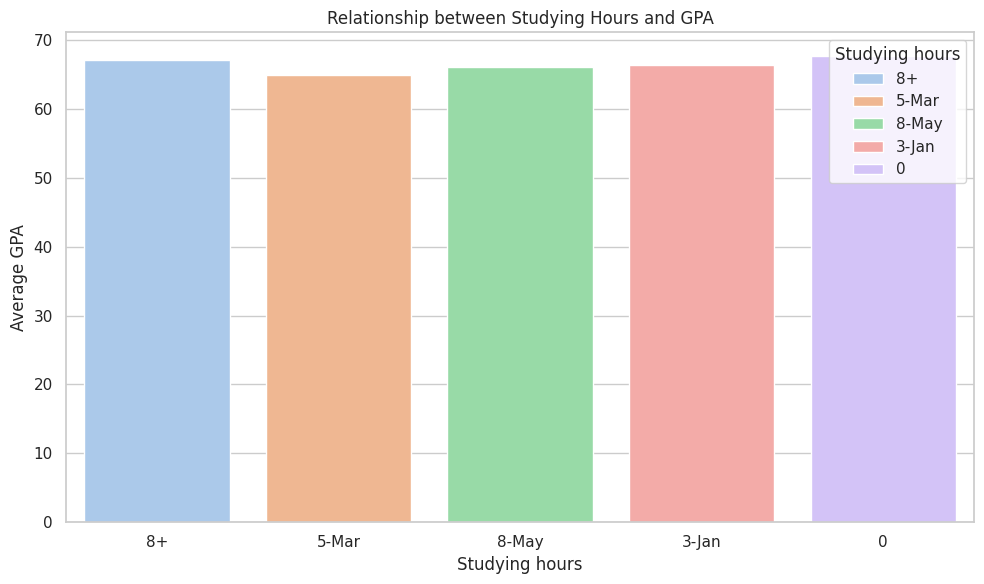

In [ ]:
# Graph 4 Analyze relationship between studying hours and GPA
plt.figure(figsize=(10, 6))
sns.barplot(x='Studying hours', y='GPA', data=df, errorbar=None, palette='pastel', hue='Studying hours', dodge=False,saturation=0.75 )
ax.legend(title='Studying hours', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.title('Relationship between Studying Hours and GPA')
plt.ylabel('Average GPA')
plt.tight_layout()
plt.show()

['Only weekends' '2' '3' '4+' '1' '0' nan]


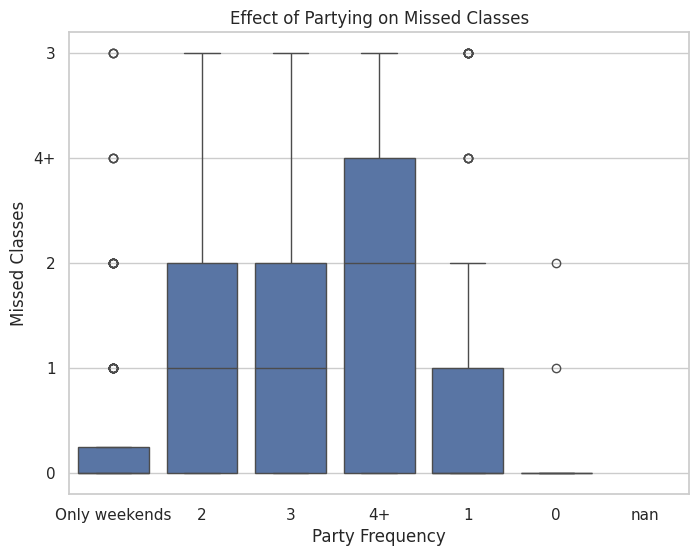

In [79]:
# Graph 5 Correlation between partying and missed classes
sns.set(style="whitegrid")

df['Party_numeric'] = df['Party'].map({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4})

# Check unique values in 'Party' column
print(df['Party'].unique())

order = df['Party'].unique()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Party', y='Missedclass', data=df, order=order)
plt.title('Effect of Partying on Missed Classes')
plt.xlabel('Party Frequency')
plt.ylabel('Missed Classes')
plt.show()


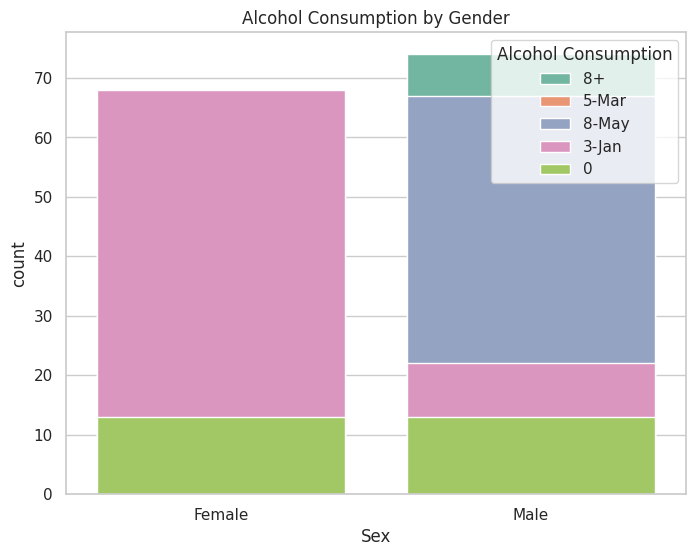

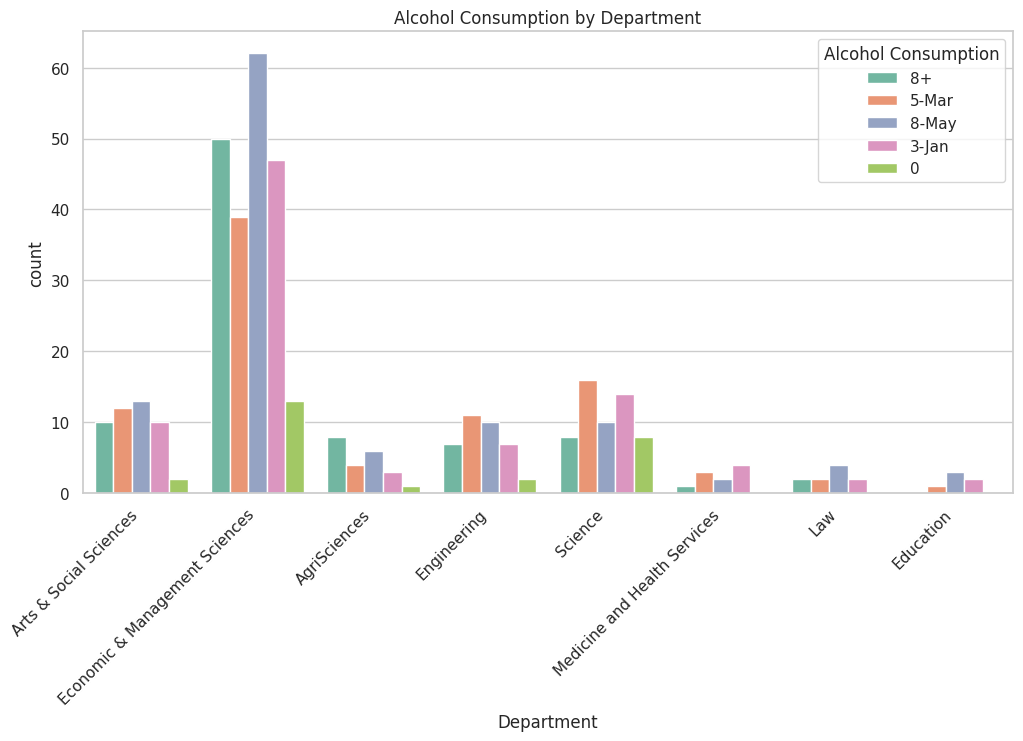

In [95]:
# Graph 6 Alcohol consumption by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Alcohol consumption', data=df, palette='Set2', dodge=False)
plt.title('Alcohol Consumption by Gender')
plt.legend(title='Alcohol Consumption', loc='upper right')
plt.show()

# Alcohol consumption by department
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Alcohol consumption', data=df, palette='Set2')
plt.title('Alcohol Consumption by Department')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Alcohol Consumption', loc='upper right')
plt.show()

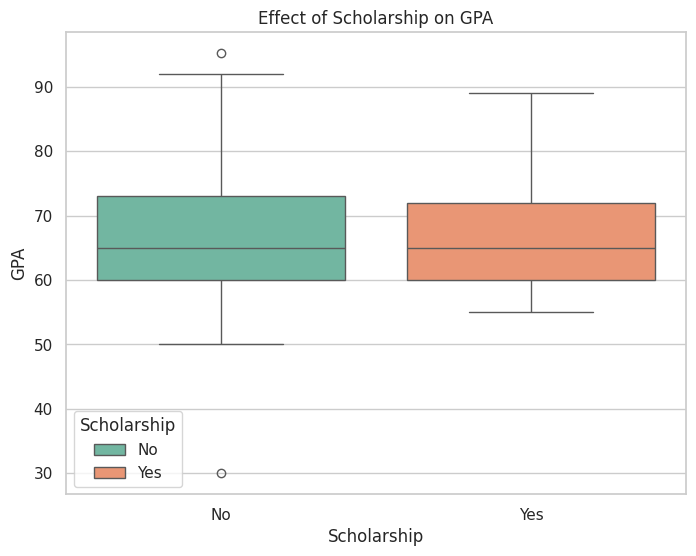

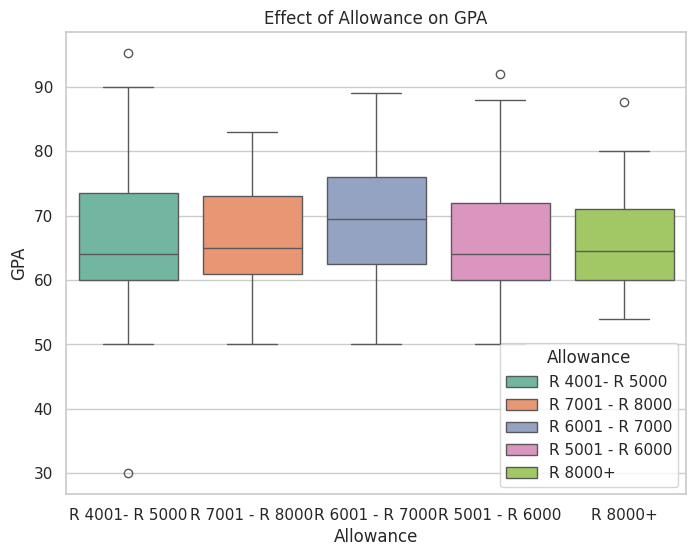

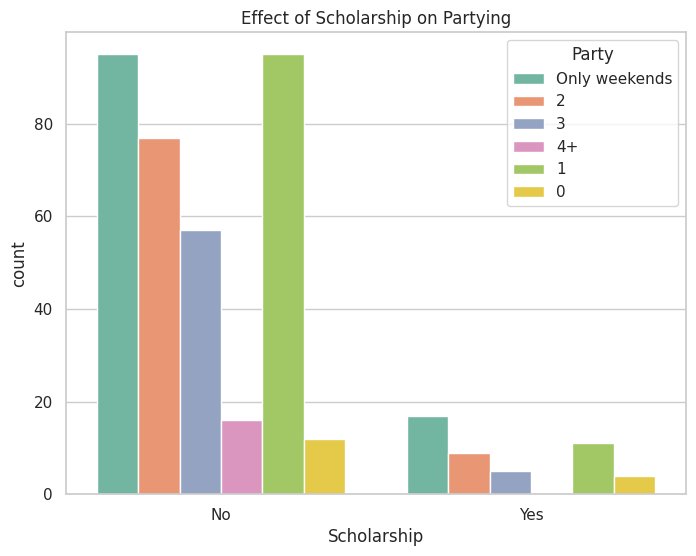

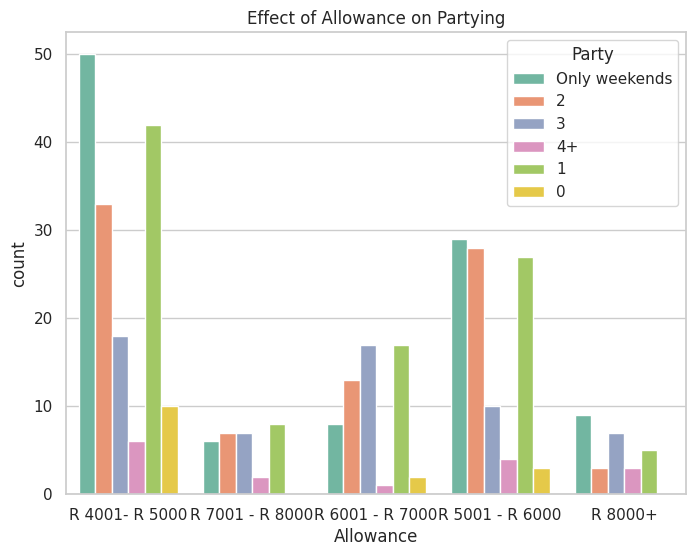

In [100]:
# Graph 7 link between financial aid and academic performance or social habits

# Financial aid and GPA
plt.figure(figsize=(8, 6))
sns.boxplot(x='Scholarship', y='GPA', data=df, palette='Set2',hue='Scholarship')
plt.title('Effect of Scholarship on GPA')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Allowance', y='GPA', data=df, palette='Set2',hue='Allowance')
plt.title('Effect of Allowance on GPA')
plt.show()

# Financial aid and partying
plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship', hue='Party', data=df, palette='Set2')
plt.title('Effect of Scholarship on Partying')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Allowance', hue='Party', data=df, palette='Set2')
plt.title('Effect of Allowance on Partying')
plt.show()

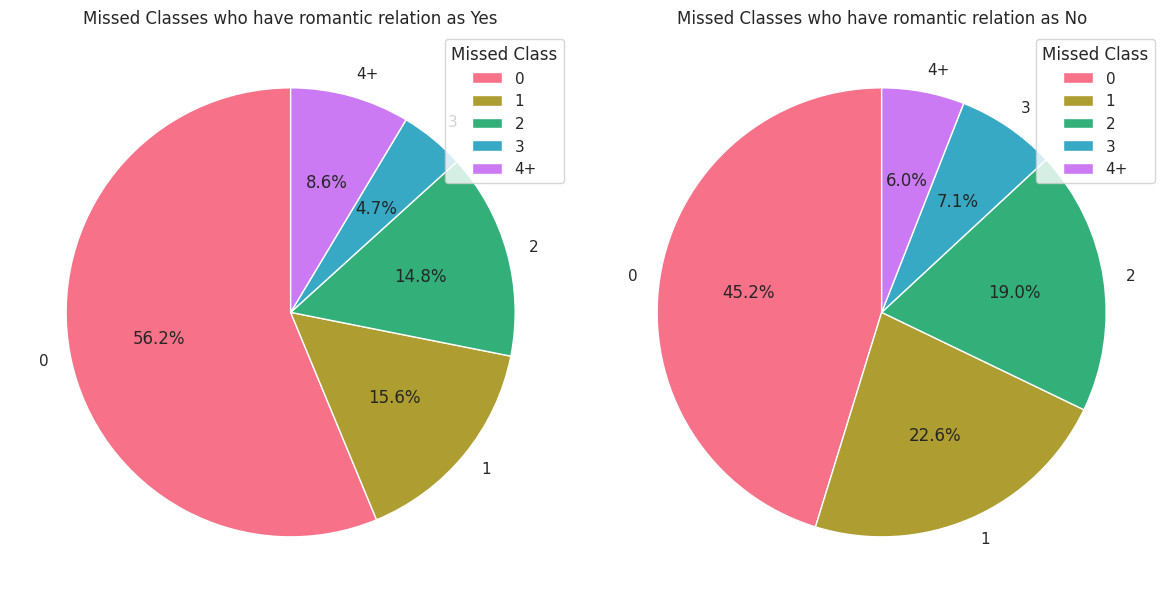

In [114]:
# Graph 8 Effect of Romantic Relationship on Missed Classes

# Remove rows with NaN values
df.dropna(inplace=True)
sns.set(style="whitegrid")

# Function to generate distinct colors based on the number of categories
def generate_colors(num_colors):
    palette = sns.color_palette("husl", num_colors)
    return [palette[i] for i in range(num_colors)]

#Actual code to find the effect of relationship on missed classes
counts_romantic = df.groupby(['Romanticrelationship', 'Missedclass']).size().reset_index(name='Counts')
unique_romantic = df['Romanticrelationship'].unique()

num_rows = len(unique_romantic) // 2 + len(unique_romantic) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

axes = axes.flatten()

for i, romantic in enumerate(unique_romantic):
    data = counts_romantic[counts_romantic['Romanticrelationship'] == romantic]
    num_categories = len(data)
    colors = generate_colors(num_categories)

    axes[i].pie(data['Counts'], labels=data['Missedclass'], colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Missed Classes who have romantic relation as {romantic}')
    axes[i].legend(title='Missed Class', loc='upper right')

for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
